In [1]:
!pip install google-cloud-translate==2.0.1
!pip install --upgrade transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 2.5 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.3.0
    Uninstalling cachetools-5.3.0:
      Successfully uninstalled cachetools-5.3.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.17.3
    Uninstalling google-auth-2.17.3:
      Successfully uninstalled google-auth-2.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 2.11.0
    Uninstalling google-api-core-2.11.0:
      Successfully uninstalled google-api-core-2.11.0
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 2.3.2
    Uninstalling google-cl

In [2]:
import datetime
import pandas as pd
from sklearn import metrics
import time
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, AdamW
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm

pd.set_option("display.max_columns", None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("./drive/MyDrive/CSC413_data/leetcode.csv")
# df = pd.read_csv("../data/leetcode.csv")
df.sample(10)

,description,Array,Dynamic Programming,String,Math,Tree,Depth-first Search,Greedy,Hash Table,Binary Search,Breadth-first Search,Sort,Two Pointers,Backtracking,Stack,Design,Graph,Bit Manipulation,Heap,Linked List,Recursion,Union Find,Sliding Window,Trie,Divide and Conquer,Segment Tree,Ordered Map,Queue,Minimax,Geometry,Binary Indexed Tree,Brainteaser,Topological Sort,Line Sweep,Random,Dequeue,Binary Search Tree,Suffix Array,Rolling Hash,Reservoir Sampling,Rejection Sampling,Memoization,OOP,Meet in the Middle
711,`S` and `T` are strings composed of lowercase ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1170,You want to schedule a list of jobs in `d` day...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90,A message containing letters from `A-Z` can be...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
286,Additive number is a string whose digits can f...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
783,A robot on an infinite XY-plane starts at poin...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
758,"An undirected, connected graph of N nodes (lab...",0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
665,Design a special dictionary which has some wor...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
321,"Given an integer `n`, return `true` if it is a...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166,"Given an integer `columnNumber`, return its co...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
401,Implement a data structure supporting the foll...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
inputs = df["description"].values
labels = df.iloc[:, 1:].values
# convert all inputs to lowercase
inputs = [i.lower() for i in inputs]

print(inputs[0])
print(labels[0])

given an array of integers `nums` and an integer `target`, return indices of the two numbers such that they add up to `target`.

you may assume that each input would have exactly one solution, and you may not use the same element twice.

you can return the answer in any order.


example 1:
input: nums = [2,7,11,15], target = 9
output: [0,1]
output: because nums[0] + nums[1] == 9, we return [0, 1].

example 2:
input: nums = [3,2,4], target = 6
output: [1,2]

example 3:
input: nums = [3,3], target = 6
output: [0,1]

constraints:
`2 <= nums.length <= 103`
`-109 <= nums[i] <= 109`
`-109 <= target <= 109`
only one valid answer exists.
[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


(array([ 3., 15., 27., 44., 51., 66., 74., 62., 79., 85., 67., 63., 87.,
        67., 73., 58., 71., 48., 52., 43., 44., 42., 37., 42., 35., 19.,
        25., 18., 22., 13., 16., 18.,  8., 10.,  7.,  6.,  8.,  8.,  4.,
        10.,  2.,  6.,  3.,  1.,  4.,  1.,  0.,  1.,  4.,  1.,  1.,  1.,
         1.,  2.,  1.,  2.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  1.,
         1.,  2.,  0.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 34.  ,  42.91,  51.82,  60.73,  69.64,  78.55,  87.46,  96.37,
        105.28, 114.19, 123.1 , 132.01, 140.92, 149.83, 158.74, 167.65,
        176.56, 185.47, 194.38, 203.29, 212.2 , 221.11, 230.02, 238.93,
        247.84, 256.75, 265.66, 274.57, 283.48, 292.39, 301.3 , 310.21,
        319.12, 328.03, 336.94, 345.85, 354.76, 363.67, 372.58, 381.49,
        390.4 , 399.31, 408.22, 417.13, 426.04, 434.95, 443.86, 452.77,
  

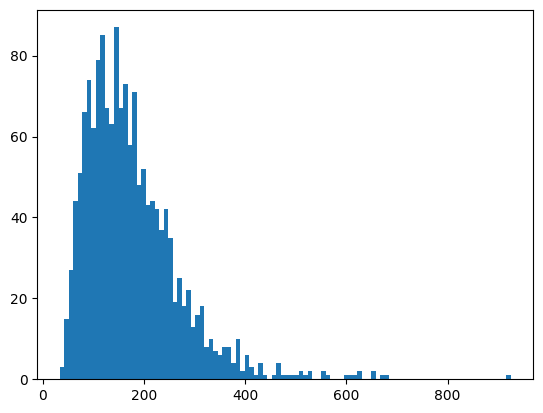

In [6]:
inputs_len = [len(i.split()) for i in inputs]
plt.hist(inputs_len, bins=100)

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [8]:
MAX_LEN = 512
num_labels = len(labels[0])
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
LEARNING_RATE = 2e-5
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base", do_lower_case=True)

In [9]:
target_cols = df.iloc[:, 1:].columns.tolist()
print(target_cols)

['Array', 'Dynamic Programming', 'String', 'Math', 'Tree', 'Depth-first Search', 'Greedy', 'Hash Table', 'Binary Search', 'Breadth-first Search', 'Sort', 'Two Pointers', 'Backtracking', 'Stack', 'Design', 'Graph', 'Bit Manipulation', 'Heap', 'Linked List', 'Recursion', 'Union Find', 'Sliding Window', 'Trie', 'Divide and Conquer', 'Segment Tree', 'Ordered Map', 'Queue', 'Minimax', 'Geometry', 'Binary Indexed Tree', 'Brainteaser', 'Topological Sort', 'Line Sweep', 'Random', 'Dequeue', 'Binary Search Tree', 'Suffix Array', 'Rolling Hash', 'Reservoir Sampling', 'Rejection Sampling', 'Memoization', 'OOP', 'Meet in the Middle']


In [10]:
def translate_text(target, dest):
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    import six
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, six.binary_type):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)

    return result

In [11]:
def transform(text):
    # randomly select a language to translate to
    lang = np.random.choice(['fr', 'zh-cn', 'es', 'de', 'ru', 'ja', 'ko'])
    translated = translate_text(text, dest=lang)
    # then translate back to english
    translated = translate_text(translated, dest='en')
    return translated

In [12]:
class BERTDataset(Dataset):
    def __init__(self, df, tokenizer, max_len, transform):
        self.df = df
        self.max_len = max_len
        self.text = df.description
        self.tokenizer = tokenizer
        self.targets = df[target_cols].values
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        # text = self.transform(text)
        inputs = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [13]:
# do train valid split
df_train = df.sample(frac=0.8, random_state=42)
df_valid = df.drop(df_train.index).reset_index(drop=True)

df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)

df_train.head()

,description,Array,Dynamic Programming,String,Math,Tree,Depth-first Search,Greedy,Hash Table,Binary Search,Breadth-first Search,Sort,Two Pointers,Backtracking,Stack,Design,Graph,Bit Manipulation,Heap,Linked List,Recursion,Union Find,Sliding Window,Trie,Divide and Conquer,Segment Tree,Ordered Map,Queue,Minimax,Geometry,Binary Indexed Tree,Brainteaser,Topological Sort,Line Sweep,Random,Dequeue,Binary Search Tree,Suffix Array,Rolling Hash,Reservoir Sampling,Rejection Sampling,Memoization,OOP,Meet in the Middle
0,Given a binary tree `root` and a linked list w...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Design a HashMap without using any built-in ha...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"You have `n` gardens, labeled from `1` to `n`,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Given an array of numbers `arr`. A sequence of...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Given an integer `n`, return the least number ...",0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
train_dataset = BERTDataset(df_train, tokenizer, MAX_LEN, transform)
valid_dataset = BERTDataset(df_valid, tokenizer, MAX_LEN, transform)

In [15]:
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, 
                          num_workers=4, shuffle=True, pin_memory=True
                         )
valid_loader = DataLoader(valid_dataset, batch_size=VALID_BATCH_SIZE,
                            num_workers=4, shuffle=False, pin_memory=True
                         ) 

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [16]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert = AutoModel.from_pretrained("microsoft/codebert-base")
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(768, 512),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(512, num_labels)
        )
    
    def forward(self, ids, mask, token_type_ids):
        _, features = self.bert(ids, attention_mask = mask, token_type_ids = token_type_ids, return_dict=False)
        output = self.fc(features)
        return output

model = BERTClass()
model.to(device)

BERTClass(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((7

In [17]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [18]:
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-2)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [19]:
def format_time(elapsed):
    elapsed_rounded = int(round(elapsed, 2))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [20]:
def validation(valid_loader, model, epoch):
    model.eval()
    total_loss = 0.0
    cnt = 0
    fin_targets=[]
    fin_outputs=[]
    t0 = time.time()
    with tqdm(valid_loader, unit="batch") as train_pbar:
        for data in train_pbar:
            train_pbar.set_description(f"Training (epoch {epoch + 1})")
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            with torch.no_grad():
                outputs = model(ids, mask, token_type_ids)
                loss = loss_fn(outputs, targets)
                total_loss += loss.item()
                cnt += 1
                fin_targets.extend(targets.cpu().detach().numpy().tolist())
                fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    outputs = np.array(fin_outputs) >= 0.5
    accuracy = metrics.accuracy_score(np.array(fin_targets), outputs)
    print("  * Average validation loss: {0:.2f}".format(total_loss/cnt))
    print("  * Accuracy: {0:.2f}".format(accuracy))
    print("  * Validation took: {:}".format(format_time(time.time() - t0)))
    return accuracy, total_loss/cnt

In [21]:
def train(train_loader, model, epoch):
    total_loss = 0.0
    cnt = 0
    model.train()
    t0 = time.time()
    with tqdm(train_loader, unit="batch") as train_pbar:
        for data in train_pbar:
            train_pbar.set_description(f"Training (epoch {epoch + 1})")
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            total_loss += loss.item()
            cnt += 1
    train_loss = total_loss/cnt
    print("  * Average training loss: {0:.2f}".format(train_loss))
    print("  * Training epoch took: {:}".format(format_time(time.time() - t0)))
    print("Running Validation...")
    
    return train_loss

In [22]:
def train_epoch(epochs, train_loader,valid_loader, model):
    train_losses = []
    val_losses = []
    accuracies = []
    for epoch in range(epochs):
        print(f'Epoch {epoch+1}/{epochs}')
        train_loss = train(train_loader, model, epoch)
        accuracy, val_loss = validation(valid_loader, model, epoch)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        accuracies.append(accuracy)
    return train_losses, val_losses, accuracies

In [23]:
def plot_loss_and_acc(loss_vals, eval_accs):
    sns.set(style='darkgrid')
    sns.set(font_scale=1.5)
    plt.rcParams["figure.figsize"] = (8,6)
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(loss_vals, 'b-o', label = 'training loss')
    ax2 = ax1.twinx()
    ax2.plot(eval_accs, 'y-o', label = 'validation accuracy')
    ax2.set_title("Training loss and validation accuracy")
    ax2.set_xlabel("Epoch")
    ax1.set_ylabel("Loss", color='b')
    ax2.set_ylabel("Accuracy", color='y')
    ax1.tick_params(axis='y', rotation=0, labelcolor='b' )
    ax2.tick_params(axis='y', rotation=0, labelcolor='y' )
    plt.show()

In [24]:
all_train_losses = []
all_val_losses = []
all_accuracies = []

In [32]:
EPOCHS = 10
train_losses, val_losses, accuracies = train_epoch(EPOCHS, train_loader, valid_loader, model)
all_train_losses.extend(train_losses)
all_val_losses.extend(val_losses)
all_accuracies.extend(accuracies)

Epoch 1/10


  0%|          | 0/158 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Training (epoch 1): 100%|██████████| 158/158 [01:53<00:00,  1.39batch/s]


  * Average training loss: 0.04
  * Training epoch took: 0:01:53
Running Validation...


Training (epoch 1): 100%|██████████| 40/40 [00:09<00:00,  4.09batch/s]


  * Average validation loss: 0.12
  * Accuracy: 0.20
  * Validation took: 0:00:09
Epoch 2/10


  0%|          | 0/158 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Training (epoch 2): 100%|██████████| 158/158 [01:56<00:00,  1.35batch/s]


  * Average training loss: 0.04
  * Training epoch took: 0:01:56
Running Validation...


Training (epoch 2): 100%|██████████| 40/40 [00:09<00:00,  4.05batch/s]


  * Average validation loss: 0.13
  * Accuracy: 0.20
  * Validation took: 0:00:09
Epoch 3/10


  0%|          | 0/158 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Training (epoch 3): 100%|██████████| 158/158 [01:57<00:00,  1.34batch/s]


  * Average training loss: 0.04
  * Training epoch took: 0:01:57
Running Validation...


Training (epoch 3): 100%|██████████| 40/40 [00:09<00:00,  4.03batch/s]


  * Average validation loss: 0.13
  * Accuracy: 0.20
  * Validation took: 0:00:09
Epoch 4/10


  0%|          | 0/158 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Training (epoch 4): 100%|██████████| 158/158 [01:57<00:00,  1.34batch/s]


  * Average training loss: 0.03
  * Training epoch took: 0:01:57
Running Validation...


Training (epoch 4): 100%|██████████| 40/40 [00:09<00:00,  4.04batch/s]


  * Average validation loss: 0.13
  * Accuracy: 0.21
  * Validation took: 0:00:09
Epoch 5/10


  0%|          | 0/158 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Training (epoch 5): 100%|██████████| 158/158 [01:57<00:00,  1.34batch/s]


  * Average training loss: 0.03
  * Training epoch took: 0:01:57
Running Validation...


Training (epoch 5): 100%|██████████| 40/40 [00:09<00:00,  4.02batch/s]


  * Average validation loss: 0.14
  * Accuracy: 0.20
  * Validation took: 0:00:09
Epoch 6/10


  0%|          | 0/158 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Training (epoch 6): 100%|██████████| 158/158 [01:57<00:00,  1.34batch/s]


  * Average training loss: 0.03
  * Training epoch took: 0:01:57
Running Validation...


Training (epoch 6): 100%|██████████| 40/40 [00:09<00:00,  4.01batch/s]


  * Average validation loss: 0.14
  * Accuracy: 0.18
  * Validation took: 0:00:09
Epoch 7/10


  0%|          | 0/158 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Training (epoch 7): 100%|██████████| 158/158 [01:57<00:00,  1.34batch/s]


  * Average training loss: 0.03
  * Training epoch took: 0:01:57
Running Validation...


Training (epoch 7): 100%|██████████| 40/40 [00:09<00:00,  4.03batch/s]


  * Average validation loss: 0.15
  * Accuracy: 0.19
  * Validation took: 0:00:09
Epoch 8/10


  0%|          | 0/158 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Training (epoch 8): 100%|██████████| 158/158 [01:57<00:00,  1.34batch/s]


  * Average training loss: 0.02
  * Training epoch took: 0:01:57
Running Validation...


Training (epoch 8): 100%|██████████| 40/40 [00:10<00:00,  4.00batch/s]


  * Average validation loss: 0.15
  * Accuracy: 0.21
  * Validation took: 0:00:10
Epoch 9/10


  0%|          | 0/158 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Training (epoch 9): 100%|██████████| 158/158 [01:57<00:00,  1.34batch/s]


  * Average training loss: 0.02
  * Training epoch took: 0:01:57
Running Validation...


Training (epoch 9): 100%|██████████| 40/40 [00:09<00:00,  4.01batch/s]


  * Average validation loss: 0.15
  * Accuracy: 0.18
  * Validation took: 0:00:09
Epoch 10/10


  0%|          | 0/158 [00:00<?, ?batch/s]/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Training (epoch 10): 100%|██████████| 158/158 [01:57<00:00,  1.34batch/s]


  * Average training loss: 0.02
  * Training epoch took: 0:01:57
Running Validation...


Training (epoch 10): 100%|██████████| 40/40 [00:09<00:00,  4.02batch/s]

  * Average validation loss: 0.16
  * Accuracy: 0.20
  * Validation took: 0:00:09


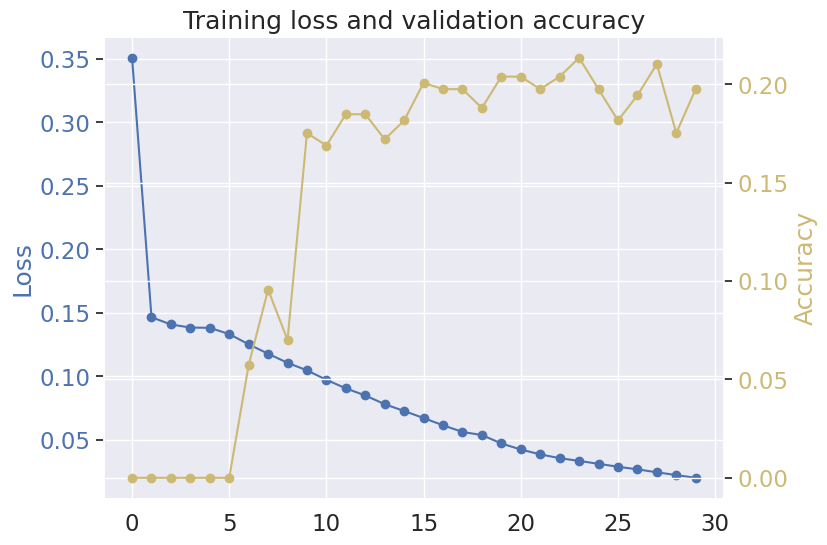

In [33]:
plot_loss_and_acc(all_train_losses, all_accuracies)

## Predict Single Sentence and Predict based on original tags

In [34]:
def predict_single(input_text, threshold = 0.5):
    model.eval()
    with torch.no_grad():
        inputs = tokenizer.encode_plus(
            input_text,
            truncation=True,
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]
        
        ids = torch.tensor(ids, dtype=torch.long).unsqueeze(0).to(device)
        mask = torch.tensor(mask, dtype=torch.long).unsqueeze(0).to(device)
        token_type_ids = torch.tensor(token_type_ids, dtype=torch.long).unsqueeze(0).to(device)
        
        outputs = model(ids, mask, token_type_ids)
        outputs = torch.sigmoid(outputs).cpu().detach().numpy().tolist()[0]
        outputs = np.array(outputs) >= threshold
        return outputs

In [28]:
def label_to_text(labels):
    return [target_cols[i] for i in range(len(labels)) if labels[i]]

In [37]:
test_input = """
Given a string s, find the longest palindromic subsequence's length in s.

A subsequence is a sequence that can be derived from another sequence by deleting some or no elements without changing the order of the remaining elements.

 

Example 1:

Input: s = "bbbab"
Output: 4
Explanation: One possible longest palindromic subsequence is "bbbb".
Example 2:

Input: s = "cbbd"
Output: 2
Explanation: One possible longest palindromic subsequence is "bb".
 

Constraints:

1 <= s.length <= 1000
s consists only of lowercase English letters.
"""
res = predict_single(test_input, 0.5)
print(label_to_text(res))

['Dynamic Programming']


In [36]:
# test label count accuracy, select top number of labels from prediction based on original label count
valid_inputs = df_valid['description'].values
valid_labels = df_valid.iloc[:, 1:].values
accuracies = []
for i, descrip in enumerate(valid_inputs):
    res = predict_single(descrip)
    top_preds = res >= 0.5
    # print(f"Original labels: {label_to_text(valid_labels[i])}")
    # print(f"Predicted labels: {label_to_text(top_preds)}")
    # also calculate accuracy
    accu = metrics.accuracy_score(valid_labels[i], top_preds)
    accuracies.append(accu)
    # print(f'finished #{i} prediction')
print(f"Average accuracy: {np.mean(accuracies)}")

Average accuracy: 0.9632647015256999
